# Apple Mobility Data


The Apple Mobility data used for this project is Time Series Data.
Time series data is a collection of data points that are assembled over periods in time and ordered chronologically. The time interval at which the data is collected is often referred to as the time series frequency.

In [1]:
# Dependencies and Setup
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import urllib.request

### Retrieving the link of the Apple Mobility Trends report file via API

In [2]:
with urllib.request.urlopen('https://covid19-static.cdn-apple.com/covid19-mobility-data/current/v3/index.json') as url:
    json_data = json.loads(url.read().decode())
link = 'https://covid19-static.cdn-apple.com' + json_data['basePath'] + json_data['regions']['en-us']['csvPath']
link

'https://covid19-static.cdn-apple.com/covid19-mobility-data/2014HotfixDev14/v3/en-us/applemobilitytrends-2020-08-13.csv'

### Retrieving the Apple Mobility trends report as csv

In [3]:
data_dir = 'Data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

path = os.path.join(data_dir, 'applemobilitytrends.csv')
urllib.request.urlretrieve(link, path)

('Data/applemobilitytrends.csv', <http.client.HTTPMessage at 0x7f7ef43fc290>)

In [4]:
df = pd.read_csv(path)
df

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,193.56,201.82,187.74,203.09,218.60,234.00,230.14,215.44,216.40,232.93
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,140.26,152.96,144.52,150.49,151.17,140.72,163.50,166.27,168.27,161.58
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,57.82,58.69,57.83,66.13,63.37,36.89,55.64,57.49,59.57,60.74
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,49.23,47.49,43.61,48.15,48.86,27.78,43.74,45.29,46.27,47.79
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,88.74,87.77,92.37,90.20,73.91,78.69,82.83,85.36,89.13,95.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,county,York County,driving,NaN,Virginia,United States,100.0,100.96,111.03,111.97,...,160.14,192.54,186.80,224.21,278.61,204.46,187.39,187.82,180.44,185.06
3621,county,York County,driving,NaN,Maine,United States,100.0,103.05,103.98,82.24,...,227.79,251.82,275.31,315.77,344.68,323.34,274.71,266.75,264.64,281.56
3622,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,166.26,172.56,143.90,230.83,202.37,161.92,161.59,174.66,162.53,186.45
3623,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,161.44,157.96,167.28,190.22,183.21,163.29,165.03,160.60,160.27,167.81


### Filter the data so that only the US is in the DataFrame

In [5]:
df_us = df[df['country'] == 'United States']
df_us.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13
158,city,Akron,driving,NaN,Ohio,United States,100.0,103.06,107.50,106.14,...,148.57,157.46,159.12,177.50,168.17,133.00,150.64,154.30,156.01,161.10
159,city,Akron,transit,NaN,Ohio,United States,100.0,106.69,103.75,100.22,...,45.22,55.59,50.66,55.07,49.71,40.74,58.09,61.32,52.43,57.50
160,city,Akron,walking,NaN,Ohio,United States,100.0,97.23,79.05,74.77,...,115.93,129.45,127.06,142.07,129.24,93.44,118.53,122.11,123.79,129.98
161,city,Albany,driving,NaN,New York,United States,100.0,102.35,107.35,105.54,...,121.81,146.10,147.56,154.22,143.79,116.19,135.01,137.04,141.15,147.66
162,city,Albany,transit,NaN,New York,United States,100.0,100.14,105.95,107.76,...,75.20,90.11,86.76,86.99,86.02,75.34,87.09,88.62,85.51,90.76


### Cleaning Data

In [6]:
# Check the df for NaN # Interesting to note the the following dates retrieved no data '2020-05-11', '2020-05-12'
df_us.columns[df_us.isna().any()].tolist()

['alternative_name', 'sub-region', '2020-05-11', '2020-05-12']

In [7]:
# Look at rows that have the NA value in the 'sub-region' column
df_us[df_us['sub-region'].isna()]

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13
924,city,Washington DC,driving,DC,NaN,United States,100.0,105.82,109.02,110.37,...,101.98,118.04,113.55,132.12,133.39,106.17,111.62,114.90,113.39,112.24
925,city,Washington DC,transit,DC,NaN,United States,100.0,100.78,103.92,105.02,...,35.12,40.52,37.48,40.36,37.72,32.93,38.64,38.74,38.30,36.74
926,city,Washington DC,walking,DC,NaN,United States,100.0,99.07,109.61,104.16,...,80.48,92.29,87.44,106.80,119.12,88.44,87.05,86.87,85.17,84.77
945,sub-region,Alabama,driving,NaN,NaN,United States,100.0,102.90,103.51,109.71,...,156.35,161.33,169.90,195.32,196.83,145.43,156.83,155.36,158.80,168.08
947,sub-region,Alaska,driving,NaN,NaN,United States,100.0,104.69,104.64,110.10,...,203.00,209.88,204.90,237.60,224.50,182.73,198.87,195.38,200.80,206.68
963,sub-region,Arizona,driving,NaN,NaN,United States,100.0,104.06,106.90,111.45,...,109.43,107.15,110.66,127.13,124.89,98.44,105.44,108.16,108.50,111.98
964,sub-region,Arkansas,driving,NaN,NaN,United States,100.0,102.55,101.93,106.38,...,159.30,161.14,166.38,192.05,185.73,142.34,156.98,153.04,159.56,170.15
1004,sub-region,California,driving,NaN,NaN,United States,100.0,104.39,109.34,109.36,...,114.80,115.59,119.37,136.10,129.46,109.92,113.79,115.07,117.23,120.06
1068,sub-region,Colorado,driving,NaN,NaN,United States,100.0,103.46,105.66,109.36,...,149.15,155.38,159.73,180.48,169.02,143.69,150.71,152.06,158.33,162.99
1070,sub-region,Connecticut,driving,NaN,NaN,United States,100.0,105.22,108.31,109.35,...,127.25,163.72,163.88,177.20,178.98,147.50,156.45,160.96,157.71,160.24


In [8]:
# Rename - sub-regions to states - and fillna
df_us['sub-region'] = df_us['sub-region'].fillna(df_us['region'])
df_us = df_us.rename(columns={'sub-region': 'state'})
df_us

/Users/LmH80/.conda/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,geo_type,region,transportation_type,alternative_name,state,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13
158,city,Akron,driving,NaN,Ohio,United States,100.0,103.06,107.50,106.14,...,148.57,157.46,159.12,177.50,168.17,133.00,150.64,154.30,156.01,161.10
159,city,Akron,transit,NaN,Ohio,United States,100.0,106.69,103.75,100.22,...,45.22,55.59,50.66,55.07,49.71,40.74,58.09,61.32,52.43,57.50
160,city,Akron,walking,NaN,Ohio,United States,100.0,97.23,79.05,74.77,...,115.93,129.45,127.06,142.07,129.24,93.44,118.53,122.11,123.79,129.98
161,city,Albany,driving,NaN,New York,United States,100.0,102.35,107.35,105.54,...,121.81,146.10,147.56,154.22,143.79,116.19,135.01,137.04,141.15,147.66
162,city,Albany,transit,NaN,New York,United States,100.0,100.14,105.95,107.76,...,75.20,90.11,86.76,86.99,86.02,75.34,87.09,88.62,85.51,90.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,county,York County,driving,NaN,Virginia,United States,100.0,100.96,111.03,111.97,...,160.14,192.54,186.80,224.21,278.61,204.46,187.39,187.82,180.44,185.06
3621,county,York County,driving,NaN,Maine,United States,100.0,103.05,103.98,82.24,...,227.79,251.82,275.31,315.77,344.68,323.34,274.71,266.75,264.64,281.56
3622,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,166.26,172.56,143.90,230.83,202.37,161.92,161.59,174.66,162.53,186.45
3623,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,161.44,157.96,167.28,190.22,183.21,163.29,165.03,160.60,160.27,167.81


In [9]:
# Remove unneccesary columns and columns with NA values
df_us = df_us.drop(columns=['geo_type', 'region', 'alternative_name', 'country', '2020-05-11', '2020-05-12'])
df_us

,transportation_type,state,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13
158,driving,Ohio,100.0,103.06,107.50,106.14,123.62,105.99,82.68,94.99,...,148.57,157.46,159.12,177.50,168.17,133.00,150.64,154.30,156.01,161.10
159,transit,Ohio,100.0,106.69,103.75,100.22,89.04,74.85,56.99,75.59,...,45.22,55.59,50.66,55.07,49.71,40.74,58.09,61.32,52.43,57.50
160,walking,Ohio,100.0,97.23,79.05,74.77,89.55,88.39,49.30,56.29,...,115.93,129.45,127.06,142.07,129.24,93.44,118.53,122.11,123.79,129.98
161,driving,New York,100.0,102.35,107.35,105.54,128.97,88.28,82.76,102.46,...,121.81,146.10,147.56,154.22,143.79,116.19,135.01,137.04,141.15,147.66
162,transit,New York,100.0,100.14,105.95,107.76,101.39,85.79,82.86,126.71,...,75.20,90.11,86.76,86.99,86.02,75.34,87.09,88.62,85.51,90.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,driving,Virginia,100.0,100.96,111.03,111.97,136.50,136.17,104.60,117.02,...,160.14,192.54,186.80,224.21,278.61,204.46,187.39,187.82,180.44,185.06
3621,driving,Maine,100.0,103.05,103.98,82.24,129.29,121.27,95.19,116.93,...,227.79,251.82,275.31,315.77,344.68,323.34,274.71,266.75,264.64,281.56
3622,driving,Texas,100.0,98.85,97.76,92.21,115.79,128.73,92.48,114.43,...,166.26,172.56,143.90,230.83,202.37,161.92,161.59,174.66,162.53,186.45
3623,driving,California,100.0,102.98,103.10,114.08,118.83,121.49,93.29,101.86,...,161.44,157.96,167.28,190.22,183.21,163.29,165.03,160.60,160.27,167.81


### Grouping and Plotting Time series Data

In [10]:
# Group the data by transportation type
df_transport_type = df_us.groupby(['transportation_type']).sum()
df_transport_type

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13
transportation_type,,,,,,,,,,,,,,,,,,,,,
driving,225500.0,230315.54,231526.03,244945.86,289759.38,266436.74,220900.62,251056.13,230819.94,225521.58,...,393380.13,411446.26,433993.07,506044.73,514393.92,431316.39,404868.67,401794.75,409658.26,432633.23
transit,9300.0,9334.55,9301.58,9104.40,9671.07,8419.06,7130.95,8693.14,9678.75,9597.14,...,5630.38,5782.78,5676.16,5980.64,5622.99,4871.65,5756.25,5803.09,5855.98,5864.68
walking,11200.0,11582.97,11789.10,11699.88,14291.89,15424.67,10929.87,11096.28,11373.25,11450.71,...,15992.60,16583.00,16925.00,19551.05,19707.40,14580.58,16053.89,16530.65,16972.25,17564.46


In [11]:
# Use the tranpose function to transpose the data so that dates become rows
df_transport_type_t = df_transport_type.transpose()
df_transport_type_t

transportation_type,driving,transit,walking
2020-01-13,225500.00,9300.00,11200.00
2020-01-14,230315.54,9334.55,11582.97
2020-01-15,231526.03,9301.58,11789.10
2020-01-16,244945.86,9104.40,11699.88
2020-01-17,289759.38,9671.07,14291.89
...,...,...,...
2020-08-09,431316.39,4871.65,14580.58
2020-08-10,404868.67,5756.25,16053.89
2020-08-11,401794.75,5803.09,16530.65
2020-08-12,409658.26,5855.98,16972.25


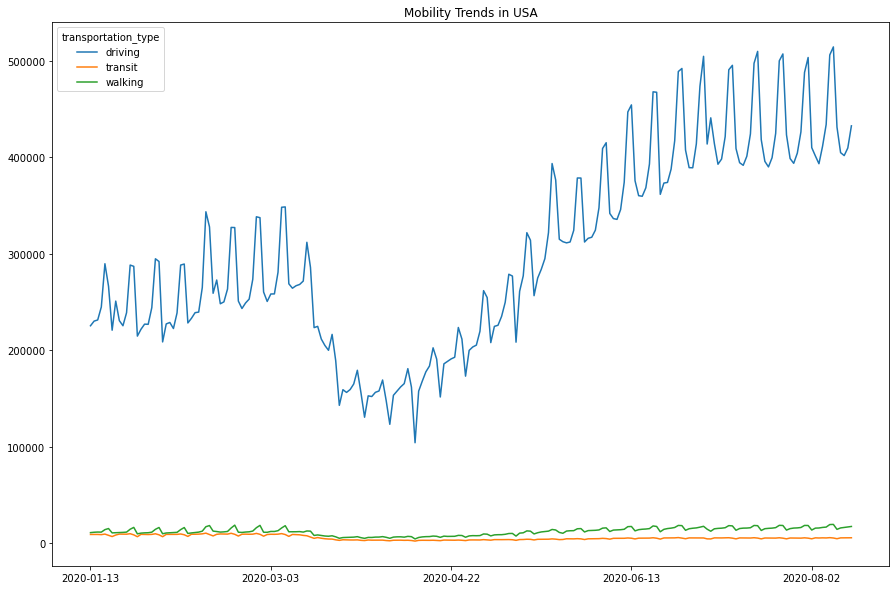

In [12]:
# Plot the transportation type data for the US ## Observable change in mobility March/April
df_transport_type_t.plot.line(figsize=(15, 10))
plt.title('Mobility Trends in USA')
plt.savefig('Mobility Trends in USA.png')

In [13]:
transport = df_transport_type_t.reset_index()
transport.columns

Index(['index', 'driving', 'transit', 'walking'], dtype='object', name='transportation_type')

In [14]:
# Filtering US Transportation Type data by specified date range
start_date = "2020-04-15"
end_date = "2020-05-15"
mask = (transport['index'] > start_date) & (transport['index'] <= end_date)
apr_may_df = transport.loc[mask]
apr_may_df.head()

transportation_type,index,driving,transit,walking
94,2020-04-16,183800.28,3199.49,7094.19
95,2020-04-17,202653.13,3297.16,7636.07
96,2020-04-18,190893.20,3087.31,7392.90
97,2020-04-19,151719.20,2872.83,6306.43
98,2020-04-20,186027.35,3478.60,7554.27


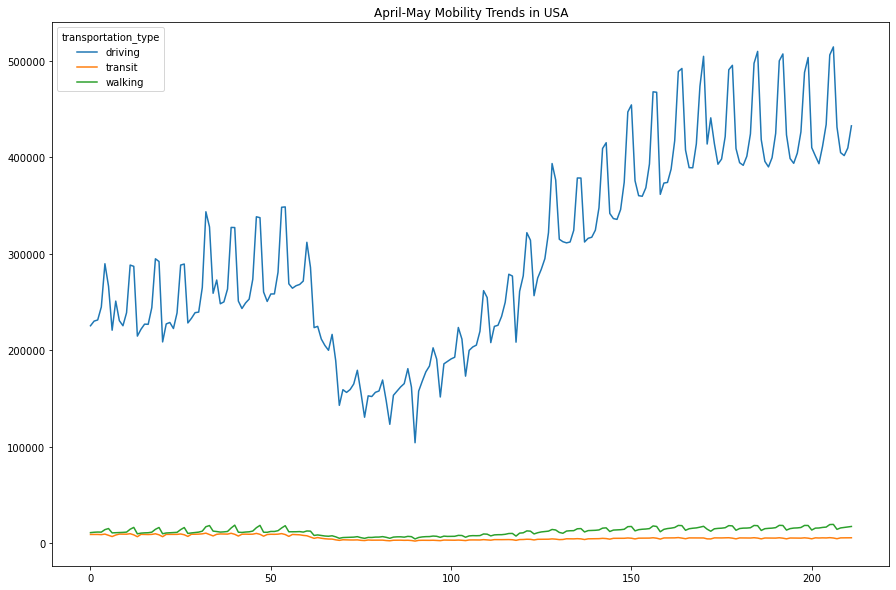

In [15]:
# Plot April - May mobility data for the US
transport.plot.line(figsize=(15, 10))
plt.title('April-May Mobility Trends in USA')
plt.savefig('April-May Mobility Trends in USA.png')

## Analyzing Data by State

In [16]:
# Retrieve and check df
df_us.head()

,transportation_type,state,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13
158,driving,Ohio,100.0,103.06,107.50,106.14,123.62,105.99,82.68,94.99,...,148.57,157.46,159.12,177.50,168.17,133.00,150.64,154.30,156.01,161.10
159,transit,Ohio,100.0,106.69,103.75,100.22,89.04,74.85,56.99,75.59,...,45.22,55.59,50.66,55.07,49.71,40.74,58.09,61.32,52.43,57.50
160,walking,Ohio,100.0,97.23,79.05,74.77,89.55,88.39,49.30,56.29,...,115.93,129.45,127.06,142.07,129.24,93.44,118.53,122.11,123.79,129.98
161,driving,New York,100.0,102.35,107.35,105.54,128.97,88.28,82.76,102.46,...,121.81,146.10,147.56,154.22,143.79,116.19,135.01,137.04,141.15,147.66
162,transit,New York,100.0,100.14,105.95,107.76,101.39,85.79,82.86,126.71,...,75.20,90.11,86.76,86.99,86.02,75.34,87.09,88.62,85.51,90.76


In [17]:
# Group the data by state
df_states = df_us.groupby(['state']).sum()
df_states

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13
state,,,,,,,,,,,,,,,,,,,,,
Alabama,5900.0,6252.10,6123.04,6613.11,8598.45,7374.73,5859.87,6962.00,6087.27,6043.34,...,9740.43,9927.06,10774.26,12639.95,13711.12,10243.87,9922.78,9660.19,9811.61,10467.29
Alaska,800.0,820.24,812.73,857.92,1022.21,1001.08,740.79,781.99,842.73,831.01,...,1720.07,1796.80,1745.34,2009.07,1992.89,1585.91,1713.95,1709.81,1712.04,1751.47
Arizona,2100.0,2180.00,2319.75,2395.60,2948.72,2965.67,2346.73,2476.85,2224.45,2232.57,...,2760.50,2721.98,2901.52,3473.61,3661.06,3396.70,2771.96,2669.12,2731.30,2903.47
Arkansas,4800.0,4926.66,4772.64,5149.10,6314.14,5879.02,4369.91,5079.63,4796.58,4283.95,...,7830.83,7934.09,8317.18,9954.62,9928.60,7883.30,7699.03,7416.91,7582.10,8290.32
California,11300.0,11423.83,11778.97,11722.34,14452.09,14427.19,11408.42,12281.68,11682.12,11879.15,...,15599.98,15808.70,16420.51,18801.32,18681.27,16459.89,15768.77,15352.22,15729.49,16290.57
Colorado,4400.0,4380.58,4490.41,4826.39,6449.80,6051.25,4901.08,5098.59,4235.70,4314.78,...,9971.91,10562.39,11029.06,12613.65,12424.29,11630.97,10570.42,10301.40,11193.49,11471.24
Connecticut,1800.0,1894.95,1951.63,1949.90,2253.95,1774.50,1666.54,1923.60,1897.89,1939.60,...,2109.92,2713.19,2710.86,2930.91,2996.31,2488.68,2637.15,2694.39,2618.37,2671.14
Delaware,400.0,393.50,405.91,413.69,482.05,404.94,348.46,394.47,384.50,389.73,...,584.75,748.20,749.23,870.55,953.48,785.34,764.91,746.00,726.37,748.85
Florida,7900.0,8007.39,8175.87,8661.50,10447.05,9857.45,7520.88,8658.06,7926.79,7823.66,...,9792.12,9908.10,10321.51,11893.51,12078.40,9669.26,9731.29,9440.90,9678.00,10206.78


In [18]:
# Use the tranpose function to transpose the data so that dates become rows
df_states_t = df_states.T


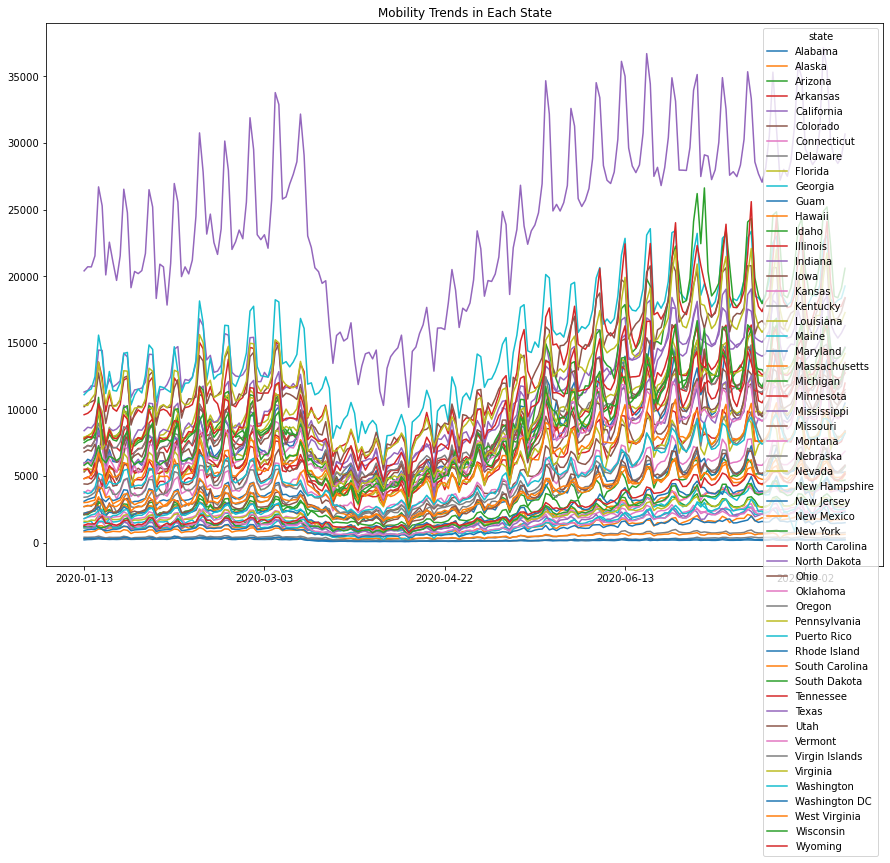

In [19]:
# Plot the mobility data for each state ## Good luck deciphering the plot - need to filter
df_states_t.plot.line(figsize=(15, 10))
plt.title('Mobility Trends in Each State')
plt.savefig('Mobility Trends in Each State.png')

### Analyzing Data of the Top 5 States

In [20]:
# Add a column 'total' to the df_states to identify the top 5 
df_states['total'] = df_states.sum(axis=1)
df_states.head()

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,total
state,,,,,,,,,,,,,,,,,,,,,
Alabama,5900.0,6252.10,6123.04,6613.11,8598.45,7374.73,5859.87,6962.00,6087.27,6043.34,...,9927.06,10774.26,12639.95,13711.12,10243.87,9922.78,9660.19,9811.61,10467.29,1759753.70
Alaska,800.0,820.24,812.73,857.92,1022.21,1001.08,740.79,781.99,842.73,831.01,...,1796.80,1745.34,2009.07,1992.89,1585.91,1713.95,1709.81,1712.04,1751.47,242089.74
Arizona,2100.0,2180.00,2319.75,2395.60,2948.72,2965.67,2346.73,2476.85,2224.45,2232.57,...,2721.98,2901.52,3473.61,3661.06,3396.70,2771.96,2669.12,2731.30,2903.47,530656.22
Arkansas,4800.0,4926.66,4772.64,5149.10,6314.14,5879.02,4369.91,5079.63,4796.58,4283.95,...,7934.09,8317.18,9954.62,9928.60,7883.30,7699.03,7416.91,7582.10,8290.32,1319033.56
California,11300.0,11423.83,11778.97,11722.34,14452.09,14427.19,11408.42,12281.68,11682.12,11879.15,...,15808.70,16420.51,18801.32,18681.27,16459.89,15768.77,15352.22,15729.49,16290.57,2544129.90


In [21]:
# Sort the values
df_states = df_states.sort_values(by = ['total'], ascending=False)
df_states.head()

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,total
state,,,,,,,,,,,,,,,,,,,,,
Texas,20400.0,20705.64,20696.43,21525.98,26706.01,25285.45,20095.78,22553.55,21060.33,19683.28,...,28786.26,31007.83,37170.24,35575.18,30068.55,28934.17,28469.15,28952.63,30671.40,5183277.59
Georgia,11100.0,11382.55,11536.09,12453.40,15573.52,14134.37,11185.79,12846.09,11426.88,11375.82,...,18502.26,19326.20,22614.33,23035.05,18290.85,17923.35,18190.19,18347.45,19259.34,3155118.54
North Carolina,9600.0,9705.22,9939.44,10609.56,13554.31,12404.85,9841.09,11145.36,10061.08,9864.59,...,17792.44,18452.89,21374.22,24106.67,19487.04,17796.31,17676.71,17750.28,18385.20,2836701.17
Ohio,10200.0,10458.00,10564.94,10713.96,12736.09,11044.02,8941.90,10299.22,10264.09,10315.32,...,17215.19,18000.06,20666.23,20928.17,16545.54,16772.30,16826.16,17330.48,18318.75,2727859.12
Virginia,10300.0,10297.79,10781.75,11152.80,13551.22,11983.50,10361.73,11427.54,10198.47,10264.32,...,17030.49,17057.40,19903.46,21741.63,17894.04,16765.25,16615.02,16577.78,17263.79,2717546.00


In [22]:
# Create a df for the top 5 states # Observation - the top 5 states for mobility - 
# Texas and Georgia were noted to be in the top states with the highest reported cases of COVID19
df_top_5_states = df_states.head(5)
df_top_5_states

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,total
state,,,,,,,,,,,,,,,,,,,,,
Texas,20400.0,20705.64,20696.43,21525.98,26706.01,25285.45,20095.78,22553.55,21060.33,19683.28,...,28786.26,31007.83,37170.24,35575.18,30068.55,28934.17,28469.15,28952.63,30671.40,5183277.59
Georgia,11100.0,11382.55,11536.09,12453.40,15573.52,14134.37,11185.79,12846.09,11426.88,11375.82,...,18502.26,19326.20,22614.33,23035.05,18290.85,17923.35,18190.19,18347.45,19259.34,3155118.54
North Carolina,9600.0,9705.22,9939.44,10609.56,13554.31,12404.85,9841.09,11145.36,10061.08,9864.59,...,17792.44,18452.89,21374.22,24106.67,19487.04,17796.31,17676.71,17750.28,18385.20,2836701.17
Ohio,10200.0,10458.00,10564.94,10713.96,12736.09,11044.02,8941.90,10299.22,10264.09,10315.32,...,17215.19,18000.06,20666.23,20928.17,16545.54,16772.30,16826.16,17330.48,18318.75,2727859.12
Virginia,10300.0,10297.79,10781.75,11152.80,13551.22,11983.50,10361.73,11427.54,10198.47,10264.32,...,17030.49,17057.40,19903.46,21741.63,17894.04,16765.25,16615.02,16577.78,17263.79,2717546.00


In [23]:
# Remove the total column to not interfere with the data represented on the plot
df_top_5_states = df_top_5_states.drop(columns=['total'])

In [24]:
# Use the tranpose function to transpose the data so that dates become rows
df_top_5_states_t = df_top_5_states.T

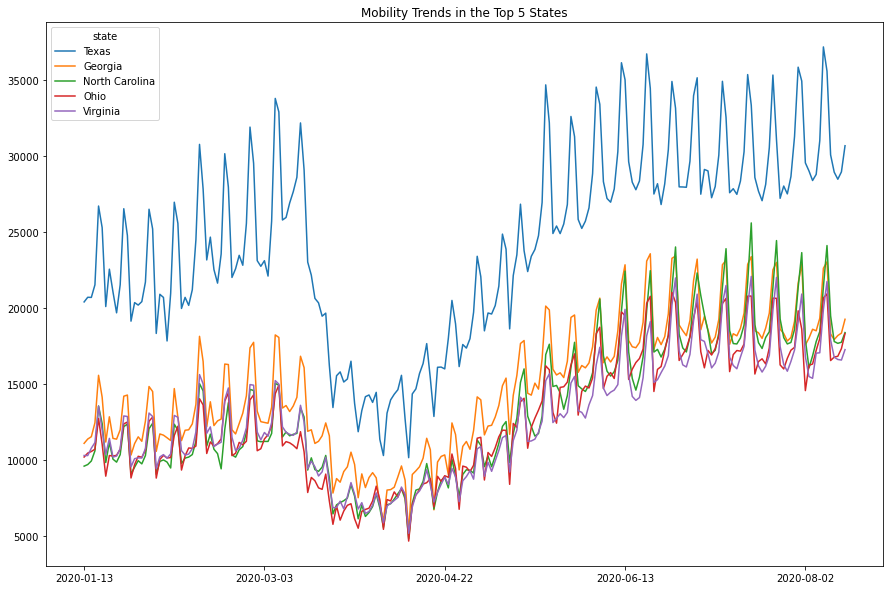

In [25]:
# Plot the mobility data for the top 5 states
df_top_5_states_t.plot.line(figsize=(15, 10))
plt.title('Mobility Trends in the Top 5 States')
plt.savefig('Mobility Trends in the Top 5 States.png')

In [26]:
top_5 = df_top_5_states_t.reset_index()
top_5.columns

Index(['index', 'Texas', 'Georgia', 'North Carolina', 'Ohio', 'Virginia'], dtype='object', name='state')

In [27]:
# Filtering US Transportation Type data by specified date range
start_date = "2020-04-15"
end_date = "2020-05-15"
mask = (top_5['index'] > start_date) & (top_5['index'] <= end_date)
top_5_apr_may_df = top_5.loc[mask]
top_5_apr_may_df.head()

state,index,Texas,Georgia,North Carolina,Ohio,Virginia
94,2020-04-16,16347.36,10122.79,8598.38,8426.39,8393.34
95,2020-04-17,17658.44,11432.92,9770.05,8511.15,9371.67
96,2020-04-18,15380.60,10683.68,8682.59,8780.49,8364.75
97,2020-04-19,12868.30,6727.51,6782.11,6912.89,7239.65
98,2020-04-20,16102.10,9871.00,7906.92,8931.28,7874.21


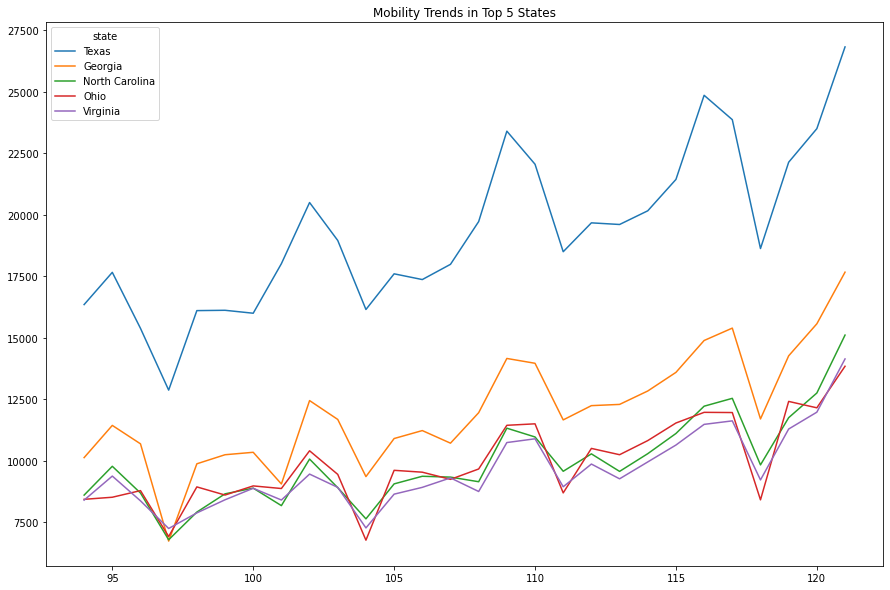

In [28]:
# Plot the mobility data for top 5 States
top_5_apr_may_df.plot.line(figsize=(15, 10))
plt.title('Mobility Trends in Top 5 States')
plt.savefig('Mobility Trends in Top 5 States.png')